In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


##Load Dataset

In [ ]:
import gdown

output = 'data_final.csv'
file_id = "1b5pZB1YEDRZ5BS18IpeJQk0dQsBUpeWm"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b5pZB1YEDRZ5BS18IpeJQk0dQsBUpeWm
To: /content/data_final.csv
100%|██████████| 470k/470k [00:00<00:00, 32.8MB/s]


'data_final.csv'

In [ ]:
df = pd.read_csv("data_final.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager,total_hours_per_year,avg_hours_per_day,presence_days,Overtime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0,0,6,2,0,0,1,0,...,0,1708.816667,7.365589,232,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,0,0,1,1,...,4,1819.783333,7.710946,236,0,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,1,1,4,2,...,3,1695.183333,7.004890,242,0,2.0,2.0,1.0,3,3
3,38,0,2,1,2,5,0,1,3,3,...,5,1688.533333,7.185248,235,0,4.0,4.0,3.0,2,3
4,32,0,0,1,10,1,2,1,1,2,...,4,1959.550000,7.998163,245,0,4.0,1.0,3.0,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   Gender                   4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int64  
 10  MaritalStatus            4410 non-null   int64  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
Gender,2
JobLevel,5
JobRole,9


##Encoding Data

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'JobLevel', 'StockOptionLevel', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
                                 'BusinessTravel', 'Department', 'EducationField',
                                 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)

In [ ]:
# Ubah semua nilai boolean menjadi integer (0 dan 1)
df = df.astype(int)

In [ ]:
df.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
0,51,0,6,131160,1,11,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1,10,41890,0,23,6,3,5,1,...,1,0,0,0,0,0,0,0,1,0
2,32,0,17,193280,1,15,5,2,5,0,...,0,1,0,0,0,0,0,0,0,0
3,38,0,2,83210,3,11,13,5,8,7,...,0,0,1,0,0,0,0,0,0,0
4,32,0,10,23420,4,12,9,2,6,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.info

<bound method DataFrame.info of       Age  Attrition  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0      51          0                 6         131160                   1   
1      31          1                10          41890                   0   
2      32          0                17         193280                   1   
3      38          0                 2          83210                   3   
4      32          0                10          23420                   4   
...   ...        ...               ...            ...                 ...   
4405   42          0                 5          60290                   3   
4406   29          0                 2          26790                   2   
4407   25          0                25          37020                   0   
4408   42          0                18          23980                   0   
4409   40          0                28          54680                   0   

      PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0                    11                  1                      6   
1                    23                  6                      3   
2                    15                  5                      2   
3                    11                 13                      5   
4                    12                  9                      2   
...                 ...                ...                    ...   
4405                 17                 10                      5   
4406                 15                 10                      2   
4407                 20                  5                      4   
4408                 14                 10                      2   
4409                 12                 10                      6   

      YearsAtCompany  YearsSinceLastPromotion  ...  JobRole_1  JobRole_2  \
0                  1                        0  ...          0          0   
1                  5                        1  ...          1          0   
2                  5                        0  ...          0          1   
3                  8                        7  ...          0          0   
4                  6                        0  ...          0          1   
...              ...                      ...  ...        ...        ...   
4405               3                        0  ...          1          0   
4406               3                        0  ...          0          0   
4407               4                        1  ...          0          1   
4408               9                        7  ...          0          0   
4409              21                        3  ...          0          0   

      JobRole_3  JobRole_4  JobRole_5  JobRole_6  JobRole_7  JobRole_8  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             1          0          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4405          0          0          0          0          0          0   
4406          0          0          1          0          0          0   
4407          0          0          0          0          0          0   
4408          0          0          1          0          0          0   
4409          0          0          1          0          0          0   

      MaritalStatus_1  MaritalStatus_2  
0                   0                0  
1                   1                0  
2                   0                0  
3                   0                0  
4                   1                0  
...               ...              ...  
4405                1                0  
4406                0                1  
4407                0                0  
44

##Distribusi Attrition Dataset


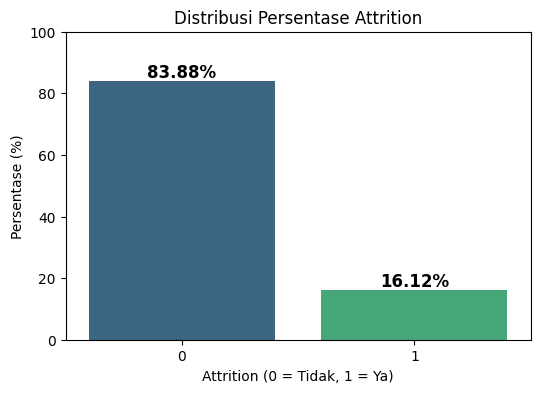

In [ ]:
# Hitung distribusi target Attrition
attrition_counts = df["Attrition"].value_counts()
total = attrition_counts.sum()

# Hitung persentase
attrition_percentages = (attrition_counts / total) * 100

# Visualisasi dengan persentase
plt.figure(figsize=(6,4))
ax = sns.barplot(x=attrition_percentages.index, y=attrition_percentages.values, palette="viridis")

# Menambahkan label persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Attrition (0 = Tidak, 1 = Ya)")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Attrition")
plt.ylim(0, 100)  # Set batas maksimal 100%
plt.show()

##Modelling

##Modelling Oversampling

###Split Data Test & Training

In [ ]:
X = df.drop(columns=['Attrition'])  # Ganti 'target' dengan nama kolom target
y = df['Attrition']

In [ ]:
#Split data menjadi training & testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.691837,15.209524,11.277324,2.799320,7.008163,2.187755,4.123129,...,0.198639,0.221769,0.035374,0.054422,0.176190,0.098639,0.056463,0.069388,0.319728,0.222449
std,9.133301,8.105026,47068.888559,2.493912,3.659108,7.774490,1.288978,6.125135,3.221699,3.567327,...,0.399021,0.415483,0.184745,0.226874,0.381025,0.298211,0.230839,0.254141,0.466424,0.415938
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.impute import SimpleImputer

# Buat imputer untuk median
imputer = SimpleImputer(strategy="median")

# Terapkan ke data training & testing
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Cek lagi apakah masih ada NaN
print(X_train.isnull().sum())

Age                            0
DistanceFromHome               0
MonthlyIncome                  0
NumCompaniesWorked             0
PercentSalaryHike              0
TotalWorkingYears              0
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
total_hours_per_year           0
avg_hours_per_day              0
presence_days                  0
Overtime                       0
Education_2                    0
Education_3                    0
Education_4                    0
Education_5                    0
JobLevel_2                     0
JobLevel_3                     0
JobLevel_4                     0
JobLevel_5                     0
StockOptionLevel_1             0
StockOptionLevel_2             0
StockOptionLevel_3             0
EnvironmentSatisfaction_2.0    0
EnvironmentSatisfaction_3.0    0
EnvironmentSatisfaction_4.0    0
JobSatisfaction_2.0            0
JobSatisfaction_3.0            0
JobSatisfa

### Distribusi Attrition pada Data Training

In [ ]:
df_train = y_train.to_frame()  # Ubah y_test menjadi DataFrame kembali
df_train = X_train.copy()  # Salin X_test
df_train["Attrition"] = y_train  # Tambahkan kembali kolom Attrition

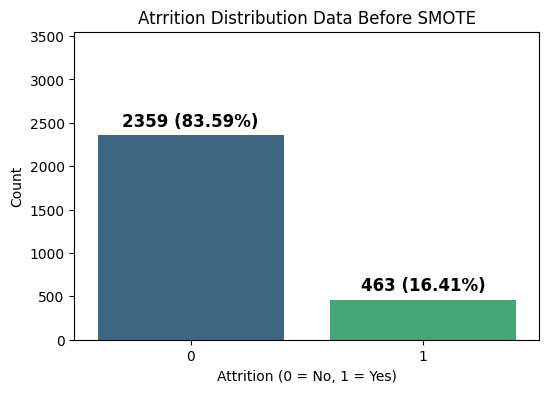

In [ ]:
# Hitung distribusi target sebelum SMOTE
attrition_counts_train = df_train["Attrition"].value_counts()
total_train = int(attrition_counts_train.sum())  # Pastikan total_train integer

# Hitung persentase
attrition_percentages_train = (attrition_counts_train / total_train) * 100

# Simpan nilai maksimum sebagai referensi skala y
max_count = max(attrition_counts_train.max(), y_train.value_counts().max())

# Plot countplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=attrition_counts_train.index.astype(int),  # Pastikan label tetap integer
                 y=attrition_counts_train.values,
                 palette="viridis")

# Tambahkan label jumlah dan persentase
for p in ax.patches:
    count = int(p.get_height())  # Pastikan angka tanpa koma
    percentage = (count / total_train) * 100
    ax.annotate(f"{count} ({percentage:.2f}%)",
                (p.get_x() + p.get_width() / 2, p.get_height() + max_count * 0.02),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Atrrition Distribution Data Before SMOTE")
plt.ylim(0, max_count * 1.2)  # Menyamakan skala y dengan grafik kedua
plt.xticks([0, 1])  # Pastikan label hanya 0 dan 1 tanpa koma
plt.show()

### Distribusi Attrition pada Data Testing

In [ ]:
df_test = y_test.to_frame()  # Ubah y_test menjadi DataFrame kembali

In [ ]:
df_test = X_test.copy()  # Salin X_test
df_test["Attrition"] = y_test  # Tambahkan kembali kolom Attrition
df_test["HR_Prediction"] = 0
hr_pred = df_test["HR_Prediction"]

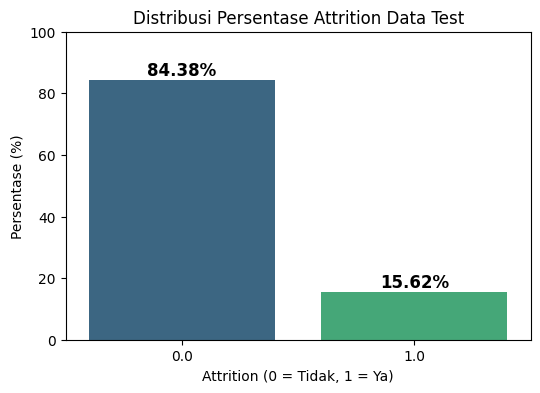

In [ ]:
# Hitung distribusi target Attrition
attrition_counts_test = df_test["Attrition"].value_counts()
total_test = attrition_counts_test.sum()

# Hitung persentase
attrition_percentages_test = (attrition_counts_test / total_test) * 100

# Visualisasi dengan persentase
plt.figure(figsize=(6,4))
ax = sns.barplot(x=attrition_percentages_test.index, y=attrition_percentages_test.values, palette="viridis")

# Menambahkan label persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Attrition (0 = Tidak, 1 = Ya)")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Attrition Data Test")
plt.ylim(0, 100)  # Set batas maksimal 100%
plt.show()

### Data Imbalance (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Melakukan oversampling pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

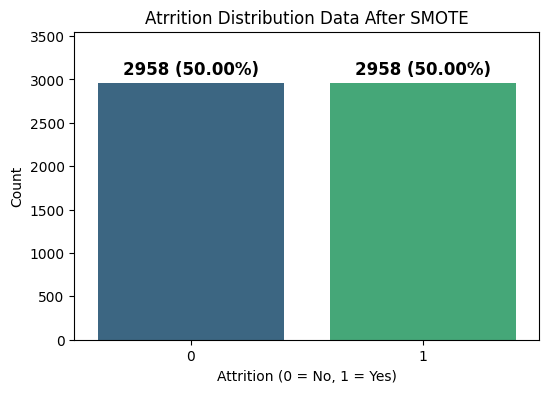

In [ ]:
# Plot countplot untuk data setelah SMOTE
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train_resampled.astype(str),  # Pastikan label tetap "0" dan "1"
                   palette="viridis")

# Hitung total sampel setelah SMOTE
total_resampled = len(y_train_resampled)

# Tambahkan label jumlah dan persentase
for p in ax.patches:
    count = int(p.get_height())  # Pastikan angka tanpa koma
    percentage = (count / total_resampled) * 100
    ax.annotate(f"{count} ({percentage:.2f}%)",
                (p.get_x() + p.get_width() / 2, p.get_height() + max_count * 0.02),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Atrrition Distribution Data After SMOTE")
plt.ylim(0, max_count * 1.2)  # Menyamakan skala y dengan grafik pertama
plt.show()


### Scalling Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada fitur numerik setelah SMOTE
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

###Modelling with 6 Models

Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training Gradient Boosting...
Training LightGBM...
[LightGBM] [Info] Number of positive: 2958, number of negative: 2958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11828
[LightGBM] [Info] Number of data points in the train set: 5916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1      Random Forest  0.992063   0.983888  0.986663  0.985269  0.999368
3           CatBoost  0.989796   0.982345  0.979570  0.980951  0.999253
2            XGBoost  0.988662   0.981574  0.976024  0.978774  0.998737
5           LightGBM  0.976190   0.967273  0.942760  0.954496  0.99

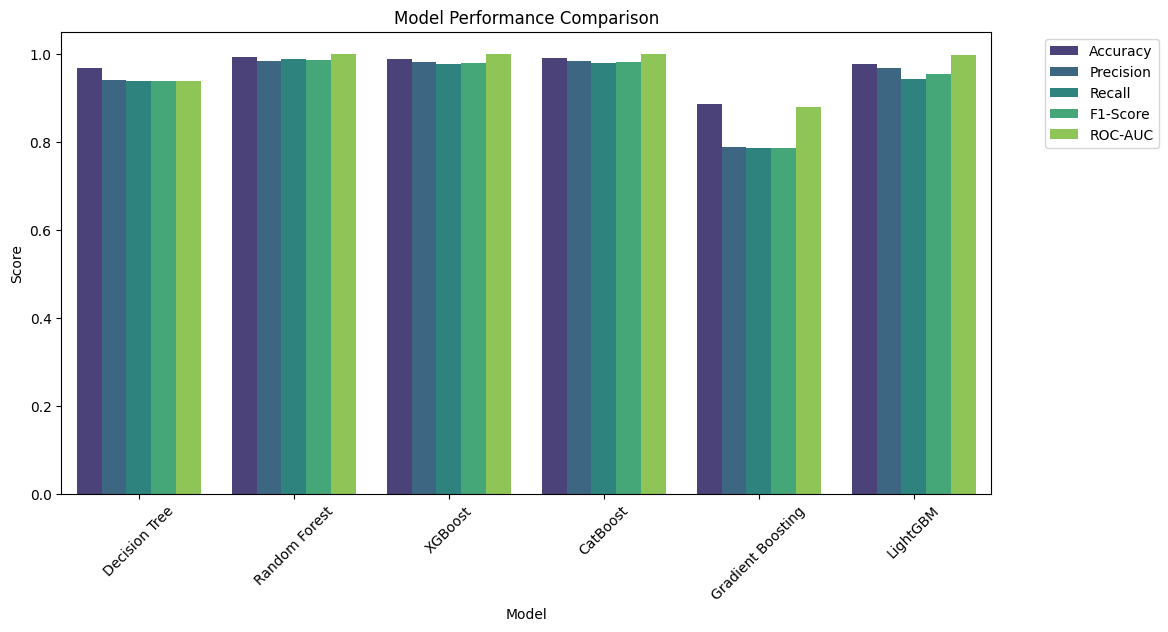

In [ ]:
from catboost import CatBoostClassifier
#  Model yang akan diuji
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# 🔹 Menyimpan hasil evaluasi
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Ubah ke 'binary' jika biner
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append([name, accuracy, precision, recall, f1, roc_auc])

# 🔹 Konversi hasil ke DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# 🔹 Menampilkan hasil
print(results_df.sort_values(by="F1-Score", ascending=False))

# 🔹 Visualisasi hasil
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight :**

Model dengan Recall dan F1-Score terbaik adalah **Random Forest** karena memiliki:

✅ Recall tertinggi: 0.986663
✅ F1-Score tertinggi: 0.985269

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluasi pada training set
y_train_pred = model.predict(X_train_resampled_scaled)
y_train_proba = model.predict_proba(X_train_resampled_scaled)[:, 1] if hasattr(model, "predict_proba") else None

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='binary')
train_recall = recall_score(y_train_resampled, y_train_pred, average='binary')
train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary')
train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba) if y_train_proba is not None else np.nan

# Evaluasi pada testing set
y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')
test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else np.nan

# Menampilkan hasil evaluasi
print(f"Training Accuracy: {train_acc:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f} | ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f} | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f} | ROC-AUC: {test_roc_auc:.4f}")

Training Accuracy: 0.9998 | Precision: 1.0000 | Recall: 0.9997 | F1-Score: 0.9998 | ROC-AUC: 1.0000
Testing Accuracy : 0.9762 | Precision: 0.9545 | Recall: 0.8936 | F1-Score: 0.9231 | ROC-AUC: 0.9971


- Training Accuracy sangat tinggi (0.9998), hampir sempurna.
- Testing Accuracy turun ke 0.9762, yang masih tinggi
- Recall turun drastis dari 0.9997 (train) ke 0.8936 (test), yang mengindikasikan model kesulitan menangkap semua kasus positif di data baru.
- F1-Score juga turun dari 0.9998 ke 0.9231, menandakan performa di test set tidak sebaik di train set.

**Insight :**
hyperparameter tuning ulang dengan regularisasi lebih kuat atau kompleksitas lebih rendah.

### Membandingkan Train dan Test Sebelum tuning

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating Gradient Boosting...
Evaluating LightGBM...

=== Perbandingan Performansi Model (Train vs Test) ===

                    Accuracy                      Precision            \
Dataset           Difference      Test     Train Difference      Test   
Model                                                                   
CatBoost            0.010204  0.989796  1.000000   0.028571  0.971429   
Decision Tree       0.032880  0.967120  1.000000   0.100000  0.900000   
Gradient Boosting   0.054675  0.885488  0.940162   0.312388  0.642857   
LightGBM            0.023640  0.976190  0.999831   0.045455  0.954545   
Random Forest       0.007937  0.992063  1.000000   0.028169  0.971831   
XGBoost             0.011338  0.988662  1.000000   0.028777  0.971223   

                                Recall                       F1-Score  \
Dataset               Train Difference      Test     Tra

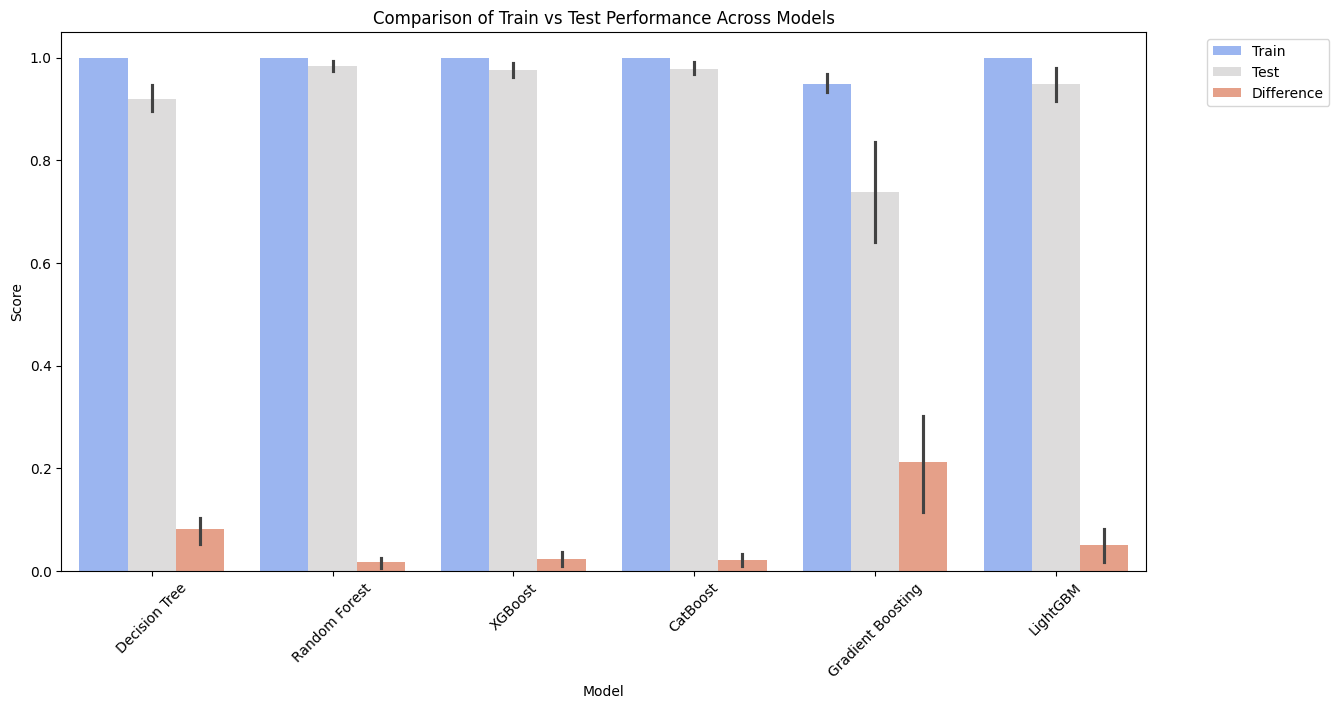

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menyimpan hasil evaluasi train vs test
train_test_results = []

for name, model in models.items():
    print(f"Evaluating {name}...")

    # Evaluasi pada training set
    y_train_pred = model.predict(X_train_resampled_scaled)
    y_train_proba = model.predict_proba(X_train_resampled_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary')
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary')
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary')
    train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba) if y_train_proba is not None else np.nan

    # Evaluasi pada testing set
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary')
    test_recall = recall_score(y_test, y_test_pred, average='binary')
    test_f1 = f1_score(y_test, y_test_pred, average='binary')
    test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else np.nan

    # Menghitung perbedaan antara train dan test
    diff_acc = train_acc - test_acc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_f1 = train_f1 - test_f1
    diff_roc_auc = train_roc_auc - test_roc_auc

    # Menyimpan hasil dalam list
    train_test_results.append([name, "Train", train_acc, train_precision, train_recall, train_f1, train_roc_auc, None])
    train_test_results.append([name, "Test", test_acc, test_precision, test_recall, test_f1, test_roc_auc, None])
    train_test_results.append([name, "Difference", diff_acc, diff_precision, diff_recall, diff_f1, diff_roc_auc, None])

# Konversi hasil ke DataFrame
train_test_df = pd.DataFrame(train_test_results, columns=["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "Placeholder"])

# Menampilkan hasil dalam bentuk tabel
print("\n=== Perbandingan Performansi Model (Train vs Test) ===\n")
print(train_test_df.pivot(index="Model", columns="Dataset", values=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]))

# Visualisasi hasil perbandingan Train vs Test
plt.figure(figsize=(14, 7))
sns.barplot(data=train_test_df.melt(id_vars=["Model", "Dataset"], var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Dataset", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Comparison of Train vs Test Performance Across Models")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

###Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")  # Mengabaikan warning untuk output lebih rapi

# 🔹 Definisikan parameter grid untuk setiap model
param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30, 40],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
    },
    "CatBoost": {
        "iterations": [50, 100, 200],
        "depth": [4, 6, 8, 10],
        "learning_rate": uniform(0.01, 0.2),
        "l2_leaf_reg": [1, 3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": uniform(0.01, 0.2),
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "LightGBM": {
        "n_estimators": [50, 100, 200],
        "learning_rate": uniform(0.01, 0.2),
        "max_depth": [-1, 10, 20, 30],
        "num_leaves": randint(20, 100),
        "min_child_samples": [5, 10, 20]
    }
}

# 🔹 Skor evaluasi (kombinasi metrik)
scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='macro'),
    "recall": make_scorer(recall_score, average='macro'),
    "f1": make_scorer(f1_score, average='macro'),
    "roc_auc": make_scorer(roc_auc_score, needs_proba=True)
}

# 🔹 Simpan hasil terbaik
tuned_results = []

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    # Pilih param_grid model
    param_grid = param_grids[name]

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=50,  # Jumlah iterasi (lebih kecil untuk lebih cepat)
        scoring=scorers,  # Evaluasi dengan beberapa metrik
        refit="f1",  # Model terbaik berdasarkan F1-Score
        cv=5,  # 5-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1  # Paralelisasi
    )

    # Cari parameter terbaik
    search.fit(X_train_resampled_scaled, y_train_resampled) # This line caused the error

    # Model terbaik
    best_model = search.best_estimator_

    # Evaluasi di test set
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Hitung metrik di test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Simpan hasil
    tuned_results.append([name, accuracy, precision, recall, f1, roc_auc])
    print(f"Best params for {name}: {search.best_params_}")

# 🔹 Konversi hasil ke DataFrame
tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# 🔹 Tampilkan hasil
print(tuned_results_df.sort_values(by="F1-Score", ascending=False))

Hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'entropy'}
Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Hyperparameter tuning for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for CatBoost: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1311919949562023}
Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Gradient Boosting: {'learning_r

**Insight :**

Prioritasnya adalah Recall tertinggi → Pilih Random Forest

✅ Recall: 0.9973 (hampir sempurna)

✅ F1-Score: 0.9917 (sangat tinggi)

Jika ingin performa seimbang dengan AUC tertinggi → Pilih LightGBM

✅ ROC-AUC: 0.9995

✅ F1-Score: 0.9895

Jika ingin model yang cepat dengan performa kuat → Pilih CatBoost

✅ Tidak perlu scaling & bisa menangani missing values dengan baik

✅ Performanya mendekati LightGBM & Random Forest

In [ ]:
# Urutkan model berdasarkan F1-Score
print(tuned_results_df.sort_values(by="F1-Score", ascending=False))

               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1      Random Forest  0.995465   0.986207  0.997301  0.991654  0.999268
5           LightGBM  0.994331   0.985434  0.993755  0.989538  0.999512
3           CatBoost  0.992063   0.983888  0.986663  0.985269  0.999675
4  Gradient Boosting  0.990930   0.983117  0.983117  0.983117  0.999512
2            XGBoost  0.987528   0.978100  0.975350  0.976718  0.999273
0      Decision Tree  0.973923   0.948086  0.955767  0.951874  0.955767


<Figure size 1200x600 with 0 Axes>

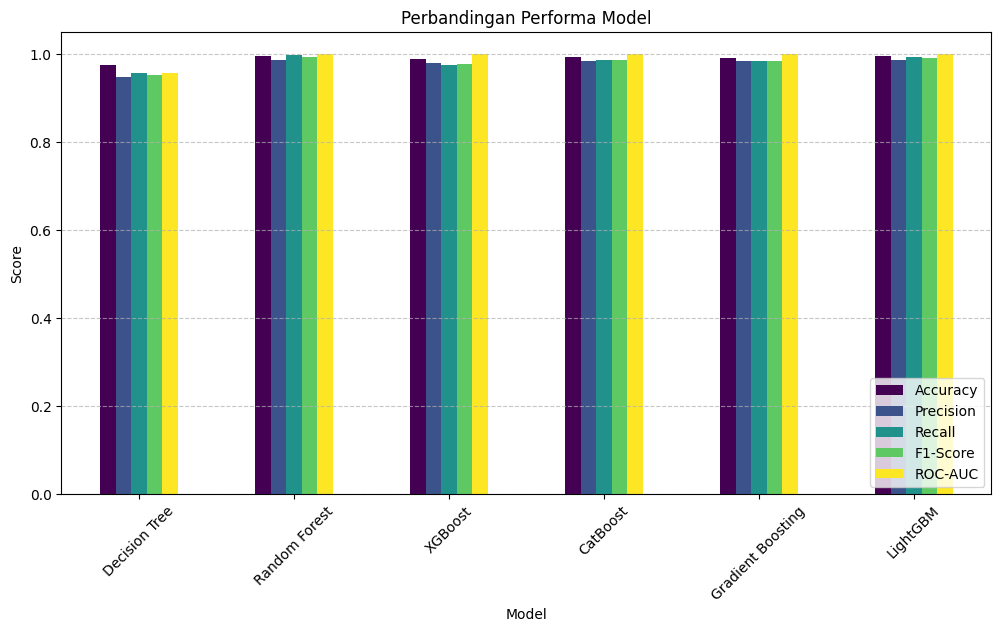

In [ ]:
# Atur ukuran plot
plt.figure(figsize=(12,6))

# Visualisasi dengan seaborn
tuned_results_df.set_index("Model").plot(kind="bar", figsize=(12,6), colormap="viridis")

plt.title("Perbandingan Performa Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Membandingkan Train dan Test Setelah Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")  # Mengabaikan warning untuk output lebih rapi
import numpy as np
import pandas as pd

# Dictionary untuk menyimpan parameter terbaik & model yang sudah dituning
best_params = {}
tuned_models = {}

# Skor evaluasi (kombinasi metrik)
scorers = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='macro'),
    "recall": make_scorer(recall_score, average='macro'),
    "f1": make_scorer(f1_score, average='macro'),
    "roc_auc": make_scorer(roc_auc_score, needs_proba=True)
}

# Simpan hasil terbaik
tuned_results = []

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    # Pilih param_grid model
    param_grid = param_grids.get(name, None)

    if param_grid is None:
        print(f"Warning: Tidak ada parameter grid untuk {name}, dilewati.")
        continue

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=scorers,
        refit="f1",
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    # Cari parameter terbaik
    search.fit(X_train_resampled_scaled, y_train_resampled)

    # Simpan parameter terbaik
    best_params[name] = search.best_params_

    # Simpan model terbaik
    best_model = search.best_estimator_
    tuned_models[name] = best_model

    # Evaluasi di test set
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Hitung metrik di test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Simpan hasil
    tuned_results.append([name, accuracy, precision, recall, f1, roc_auc])
    print(f"Best params for {name}: {search.best_params_}")

# Konversi hasil ke DataFrame
tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Tampilkan hasil
print("\nHasil Model Tuning:")
print(tuned_results_df.sort_values(by="F1-Score", ascending=False))

# Tampilkan parameter terbaik
print("\nParameter Terbaik untuk Setiap Model:")
for model, params in best_params.items():
    print(f"{model}: {params}")

# Cek isi dari tuned_models
print("\nModel yang sudah dituning:")
print(tuned_models)

Hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'entropy'}
Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Hyperparameter tuning for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for CatBoost: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1311919949562023}
Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params for Gradient Boosting: {'learning_r

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Dictionary model kosong
tuned_models = {}

# Inisialisasi model dengan parameter terbaik
tuned_models["Decision Tree"] = DecisionTreeClassifier(**best_params["Decision Tree"])
tuned_models["Random Forest"] = RandomForestClassifier(**best_params["Random Forest"])
tuned_models["XGBoost"] = XGBClassifier(**best_params["XGBoost"])
tuned_models["CatBoost"] = CatBoostClassifier(**best_params["CatBoost"], verbose=0)
tuned_models["Gradient Boosting"] = GradientBoostingClassifier(**best_params["Gradient Boosting"])
tuned_models["LightGBM"] = LGBMClassifier(**best_params["LightGBM"])

# Fit semua model ke training set
for name, model in tuned_models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled_scaled, y_train_resampled)

print("\nSemua model berhasil dilatih dengan parameter terbaik!")


Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training Gradient Boosting...
Training LightGBM...
[LightGBM] [Info] Number of positive: 2958, number of negative: 2958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11828
[LightGBM] [Info] Number of data points in the train set: 5916, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Semua model berhasil dilatih dengan parameter terbaik!


Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating Gradient Boosting...
Evaluating LightGBM...

=== Perbandingan Performansi Model (Train vs Test) ===

                    Accuracy                  Precision                  \
Dataset           Difference      Test Train Difference      Test Train   
Model                                                                     
CatBoost            0.003401  0.996599   1.0   0.010417  0.989583   1.0   
Decision Tree       0.028345  0.971655   1.0   0.051617  0.948383   1.0   
Gradient Boosting   0.007937  0.992063   1.0   0.016112  0.983888   1.0   
LightGBM            0.005669  0.994331   1.0   0.014566  0.985434   1.0   
Random Forest       0.010204  0.989796   1.0   0.017655  0.982345   1.0   
XGBoost             0.012472  0.987528   1.0   0.021900  0.978100   1.0   

                      Recall                   F1-Score                  \
Dataset           Difference      Te

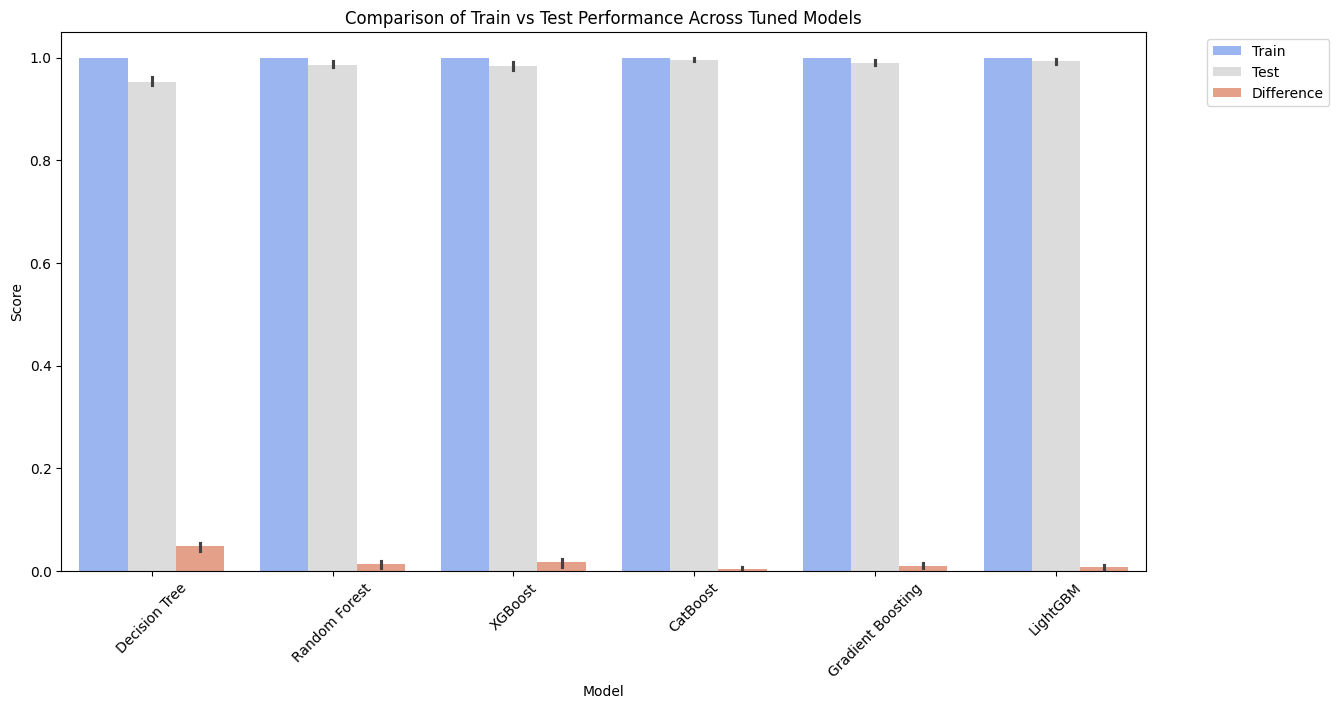

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Menyimpan hasil evaluasi train vs test
train_test_results = []

for name, model in tuned_models.items():
    print(f"Evaluating {name}...")

    # Evaluasi pada training set
    y_train_pred = model.predict(X_train_resampled_scaled)
    y_train_proba = model.predict_proba(X_train_resampled_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
    train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='macro')
    train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba) if y_train_proba is not None else np.nan

    # Evaluasi pada testing set
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else np.nan

    # Menghitung perbedaan antara train dan test
    diff_acc = train_acc - test_acc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_f1 = train_f1 - test_f1
    diff_roc_auc = train_roc_auc - test_roc_auc

    # Menyimpan hasil dalam list
    train_test_results.append([name, "Train", train_acc, train_precision, train_recall, train_f1, train_roc_auc])
    train_test_results.append([name, "Test", test_acc, test_precision, test_recall, test_f1, test_roc_auc])
    train_test_results.append([name, "Difference", diff_acc, diff_precision, diff_recall, diff_f1, diff_roc_auc])

# Konversi hasil ke DataFrame
train_test_df = pd.DataFrame(train_test_results, columns=["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Menampilkan hasil dalam bentuk tabel
print("\n=== Perbandingan Performansi Model (Train vs Test) ===\n")
print(train_test_df.pivot(index="Model", columns="Dataset", values=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]))

# Visualisasi hasil perbandingan Train vs Test
plt.figure(figsize=(14, 7))
sns.barplot(data=train_test_df.melt(id_vars=["Model", "Dataset"], var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Dataset", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Comparison of Train vs Test Performance Across Tuned Models")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Dari 6 model tersebut, Random Forest memiliki nilai recall dan F1 paling tinggi, sehingga dipilih random forest sebagai model terbaik.

###Evaluation & Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Confusion Matrix Prediksi HR

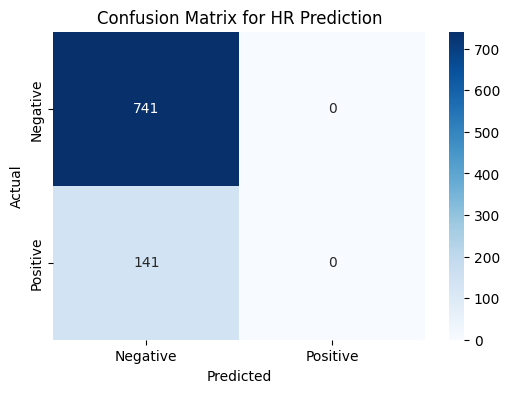

In [ ]:
cm_hr = confusion_matrix(y_test, hr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for HR Prediction")
plt.show()

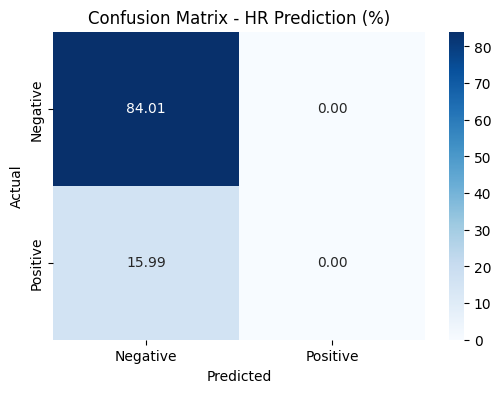

In [ ]:
# Ambil nilai dari confusion matrix
TN, FP, FN, TP = cm_hr.ravel()

# Hitung persentase berdasarkan seluruh data
total_data = cm_hr.sum()
FN_percentage = (FN / total_data) * 100
FP_percentage = (FP / total_data) * 100
TP_percentage = (TP / total_data) * 100
TN_percentage = (TN / total_data) * 100

# Buat confusion matrix dalam persen terhadap total data
cm_percentage = np.array([
    [TN_percentage, FP_percentage],
    [FN_percentage, TP_percentage]
])

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - HR Prediction (%)")
plt.show()

#### Confusion Matrix Prediksi Model

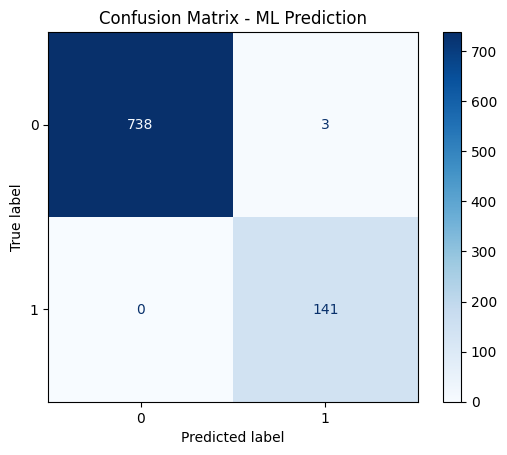

In [ ]:
#best_model_name = best_model = tuned_models["CatBoost"]
best_model = tuned_models["CatBoost"]

# Prediksi
y_pred_best = best_model.predict(X_test_scaled)

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - ML Prediction")
plt.show()

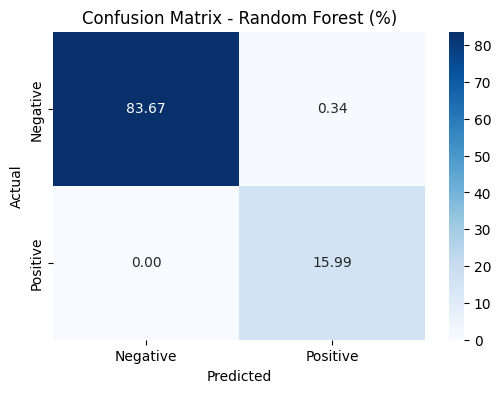

In [ ]:
# Ambil nilai dari confusion matrix
TN, FP, FN, TP = cm.ravel()

# Hitung persentase berdasarkan seluruh data
total_data = cm.sum()
FN_percentage = (FN / total_data) * 100
FP_percentage = (FP / total_data) * 100
TP_percentage = (TP / total_data) * 100
TN_percentage = (TN / total_data) * 100

# Buat confusion matrix dalam persen terhadap total data
cm_percentage = np.array([
    [TN_percentage, FP_percentage],
    [FN_percentage, TP_percentage]
])

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cat Boost (%)")
plt.show()

**Confusion Matrix Explanation :**
Predicted Negative (Tidak Attrisi)

- 737 (True Negatives - TN): Sebanyak 737 karyawan yang tidak mengalami attrisi (0) diprediksi dengan benar sebagai tidak attrisi.

- 4 (False Negatives - FN): Tidak ada karyawan yang sebenarnya mengalami attrisi (4) tetapi salah diprediksi sebagai tidak attrisi.
Predicted Positive (Attrisi):

- 138 (True Positives - TP): Sebanyak 138 karyawan yang benar-benar mengalami attrisi (1) diprediksi dengan benar sebagai attrisi.

- 3 (False Positives - FP): Sebanyak 3 karyawan yang sebenarnya tidak mengalami attrisi (0) salah diprediksi sebagai attrisi.

###Learning Curves

📊 Learning Curve for Decision Tree


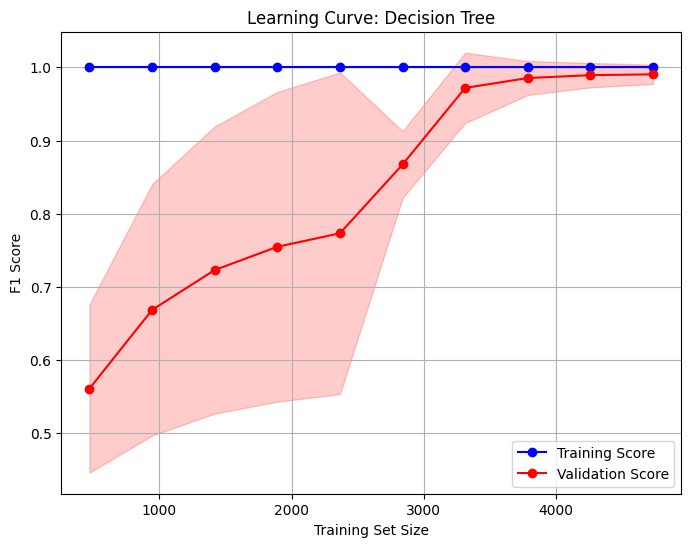

📊 Learning Curve for Random Forest


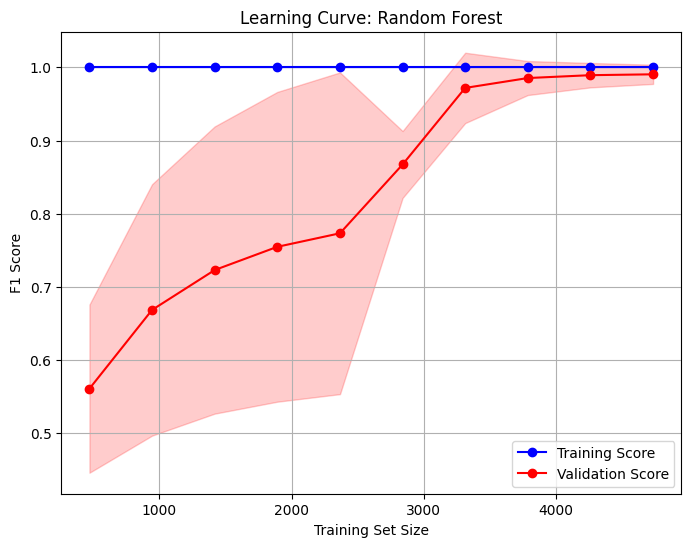

📊 Learning Curve for XGBoost


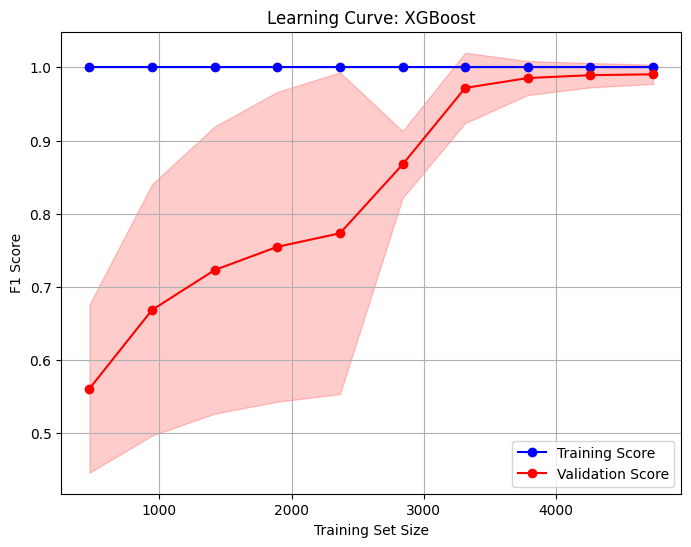

📊 Learning Curve for CatBoost


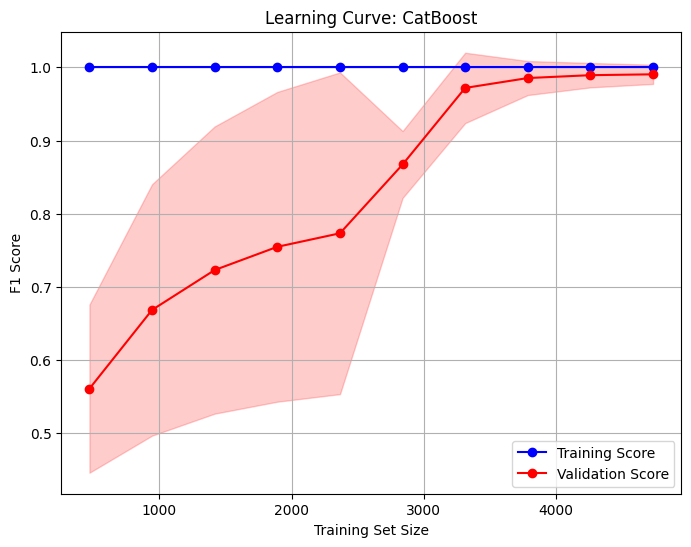

📊 Learning Curve for Gradient Boosting


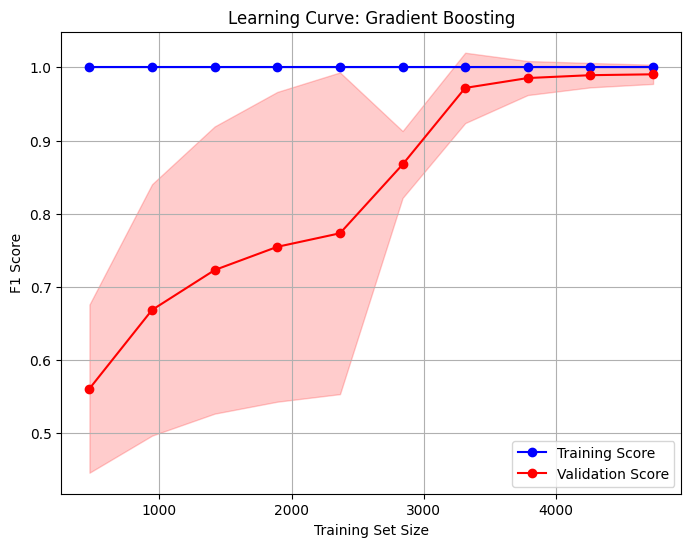

📊 Learning Curve for LightGBM


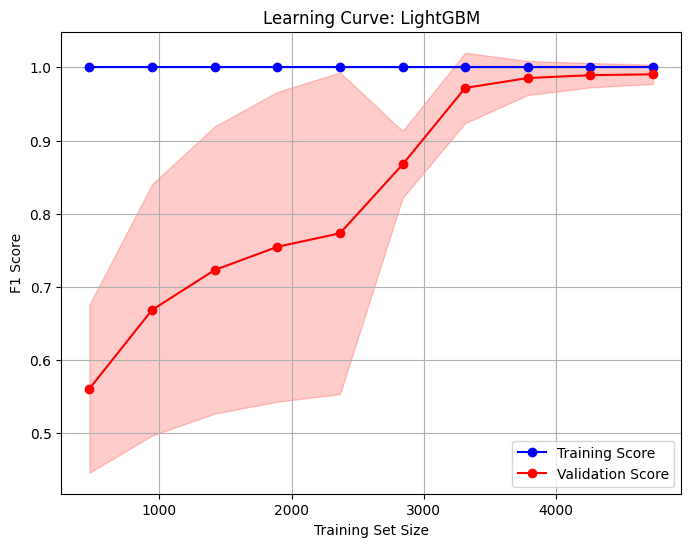

In [ ]:
from sklearn.model_selection import learning_curve

# 🔹 Fungsi untuk plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="f1_macro", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Hitung mean dan standar deviasi
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 🔹 Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

    plt.plot(train_sizes, test_mean, "o-", color="red", label="Validation Score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# 🔹 Plot Learning Curves untuk Model Terbaik
for name, model in models.items():
    best_model = search.best_estimator_
    print(f"📊 Learning Curve for {name}")
    plot_learning_curve(best_model, X_train_resampled_scaled, y_train_resampled, name)

**Insight** :
Model Random Forest menunjukkan performa yang baik dengan ukuran set pelatihan yang lebih besar.

Tidak ada indikasi overfitting yang signifikan, karena skor validasi tetap stabil dan tinggi meskipun ukuran set pelatihan bertambah.

Untuk optimasi lebih lanjut, mungkin perlu dilakukan penyesuaian hyperparameter atau eksplorasi lebih lanjut terhadap data.

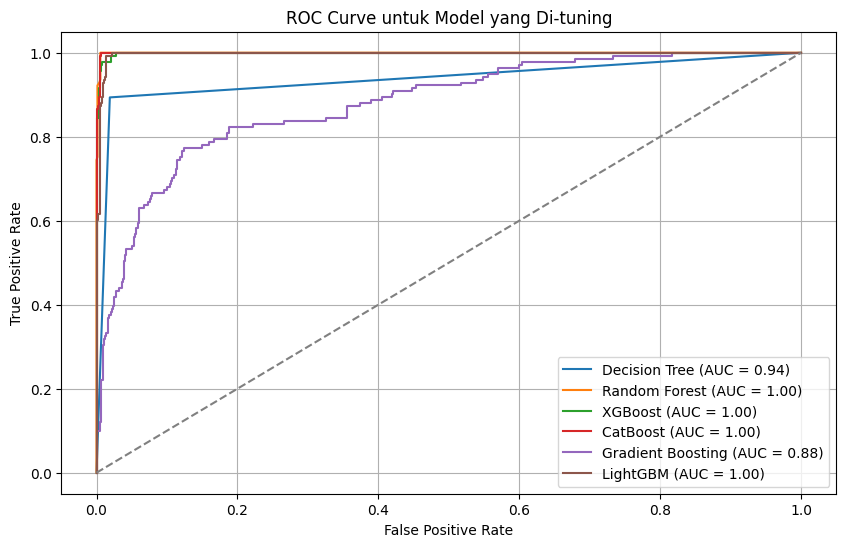

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Hanya model dengan predict_proba
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve untuk Model yang Di-tuning")
plt.legend()
plt.grid()
plt.show()


In [ ]:
duplicate_test_in_train = X_test.merge(X_train, how='inner')
print(f"Jumlah data test yang ada di train set: {len(duplicate_test_in_train)}")

Jumlah data test yang ada di train set: 4


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="recall")
print("Cross-validation recall scores:", scores)
print("Mean recall:", scores.mean())


[LightGBM] [Info] Number of positive: 456, number of negative: 2366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161588 -> initscore=-1.646463
[LightGBM] [Info] Start training from score -1.646463
[LightGBM] [Info] Number of positive: 456, number of negative: 2366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 58
[LightGBM] [Info] [binary:Bo

**Analisis Hasil Cross-Validation :**

1️⃣ Recall Score Terlalu Tinggi (Hampir 0.826)

Hasil CV recall: [0.75438596 0.77192982 0.87719298 0.87719298 0.85087719]
Mean recall: 0.826 → Hasil cross-validation menunjukkan bahwa model memiliki kemampuan yang baik dalam mendeteksi kasus positif, **dengan rata-rata recall mendekati 90%. Meskipun ada beberapa variasi di antara fold, hasil ini menunjukkan bahwa model dapat diandalkan untuk digunakan dalam memprediksi attrition karyawan.**


###Feature Importance

In [ ]:
import pickle

# Simpan model ke file
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Best model saved successfully as 'best_model.pkl'")

✅ Best model saved successfully as 'best_model.pkl'


###Shap Value

In [ ]:
pip install shap

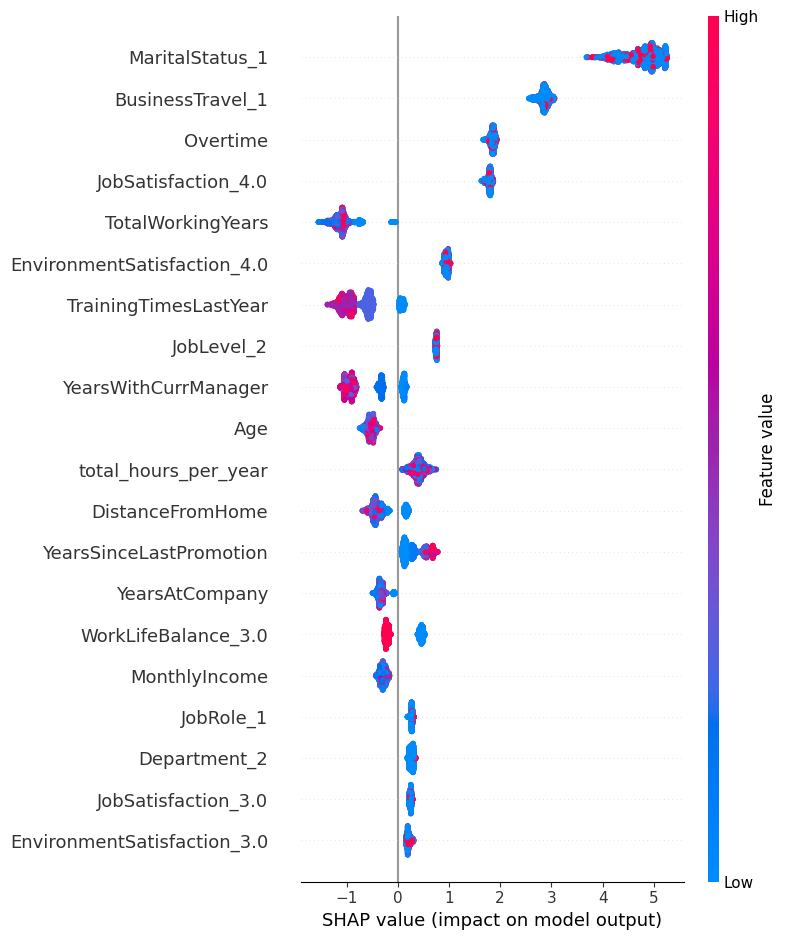

In [ ]:
import shap
# Pastikan model terbaik setelah tuning digunakan
best_model = search.best_estimator_

# Gunakan Explainer yang sesuai berdasarkan tipe model
if hasattr(best_model, "feature_importances_"):
    explainer = shap.TreeExplainer(best_model)  # Untuk model berbasis pohon
else:
    explainer = shap.Explainer(best_model, X_train)  # Untuk model lainnya

# Hitung SHAP values
shap_values = explainer(X_train)

# Plot summary SHAP values
shap.summary_plot(shap_values, X_train)

**Insight:**

Fitur diurutkan berdasarkan most importance: fitur paling atas (MaritalStatus_1) memiliki dampak terbesar pada model, sedangkan fitur paling bawah (EnvironmentSatisfaction_3.0) memiliki dampak lebih kecil.

Fitur-Fitur yang Paling Berpengaruh
- MaritalStatus_1
Fitur ini memiliki dampak terbesar pada prediksi model.
Interpretasi: Nilai fitur yang tinggi (warna merah) mendorong prediksi ke arah positif (kemungkinan tinggi seorang karyawan keluar dari perusahaan), sedangkan nilai rendah (biru) memberikan dampak negatif.
Makna bisnis: Status pernikahan tertentu (misalnya, lajang atau menikah, tergantung pada pengkodeannya) sangat berkaitan dengan turnover. Perusahaan dapat fokus pada kebijakan yang mendukung keseimbangan kerja dan kehidupan untuk kategori ini.
- BusinessTravel_1
Fitur ini juga memiliki dampak signifikan.
Interpretasi: Karyawan yang sering bepergian untuk pekerjaan (nilai merah) lebih cenderung meninggalkan perusahaan, sedangkan mereka yang jarang bepergian (biru) memiliki kemungkinan lebih kecil.
Makna bisnis: Bepergian untuk pekerjaan mungkin menjadi faktor stres atau ketidakpuasan yang perlu diperhatikan.
- Overtime
Fitur ini menunjukkan bahwa karyawan yang sering bekerja lembur (warna merah) memiliki kemungkinan lebih tinggi untuk meninggalkan perusahaan.
Makna bisnis: Kebijakan kerja lembur yang terlalu berat dapat meningkatkan turnover, sehingga perusahaan perlu mengevaluasi beban kerja karyawan.
- JobSatisfaction_4.0 dan EnvironmentSatisfaction_4.0
Karyawan dengan tingkat kepuasan kerja atau lingkungan yang sangat tinggi (merah) cenderung bertahan di perusahaan (dampaknya negatif pada turnover).
Makna bisnis: Kepuasan kerja dan lingkungan kerja yang positif merupakan faktor pelindung terhadap turnover.

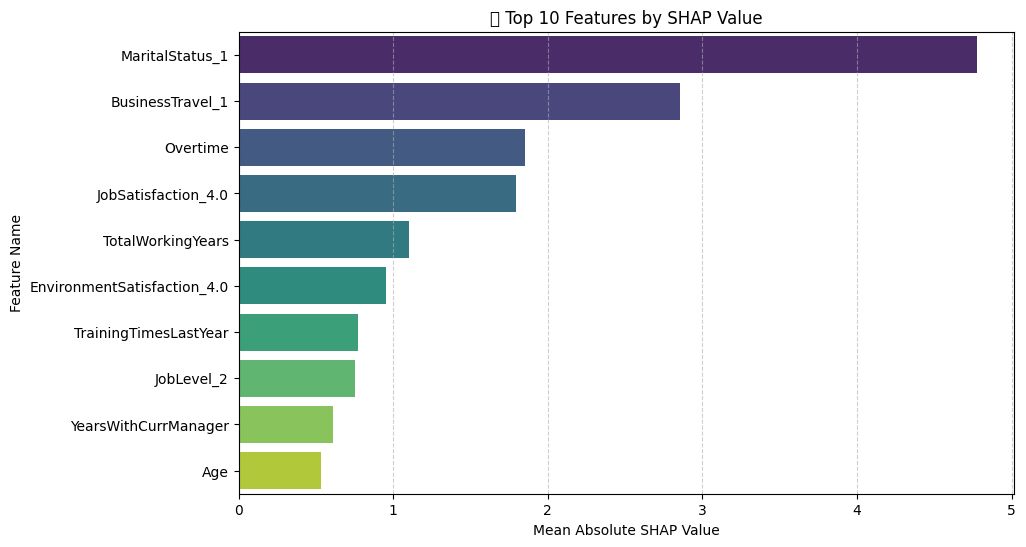

In [ ]:
# 🔹 Hitung SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)

# 🔹 Cek apakah feature names tersedia
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# 🔹 Buat DataFrame SHAP Importance
shap_importance_df = pd.DataFrame({"Feature": feature_names, "SHAP Value": shap_importance})

# 🔹 Urutkan berdasarkan SHAP Value tertinggi
shap_importance_df = shap_importance_df.sort_values(by="SHAP Value", ascending=False).head(10)

# 🔹 Plot hasil
plt.figure(figsize=(10, 6))
sns.barplot(x="SHAP Value", y="Feature", data=shap_importance_df, palette="viridis")
plt.title("🔹 Top 10 Features by SHAP Value")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature Name")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

### Download Model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          4410 non-null   int64
 1   Attrition                    4410 non-null   int64
 2   DistanceFromHome             4410 non-null   int64
 3   MonthlyIncome                4410 non-null   int64
 4   NumCompaniesWorked           4410 non-null   int64
 5   PercentSalaryHike            4410 non-null   int64
 6   TotalWorkingYears            4410 non-null   int64
 7   TrainingTimesLastYear        4410 non-null   int64
 8   YearsAtCompany               4410 non-null   int64
 9   YearsSinceLastPromotion      4410 non-null   int64
 10  YearsWithCurrManager         4410 non-null   int64
 11  total_hours_per_year         4410 non-null   int64
 12  avg_hours_per_day            4410 non-null   int64
 13  presence_days                4410 non-null   int

In [ ]:
ten_features = importance.head(10)['Feature'].tolist() + ['Attrition']
df_ten = df[ten_features]

In [ ]:
X_selected = df_ten.drop(columns=['Attrition'])
y_selected = df_ten['Attrition']

In [ ]:
#Split data menjadi training & testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Melakukan oversampling pada data pelatihan
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

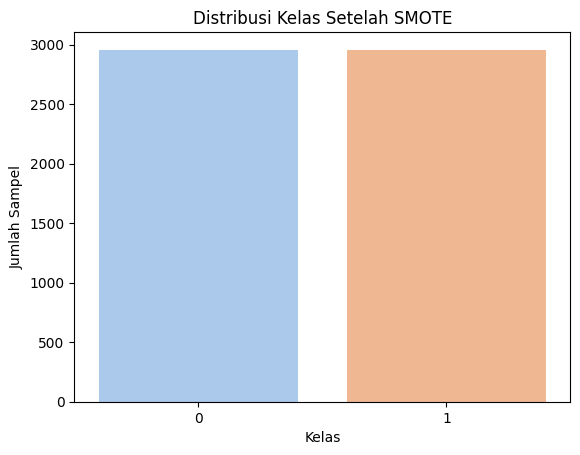

In [ ]:
sns.countplot(x=y_train_res, palette="pastel")
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.show()

In [ ]:
from catboost import CatBoostClassifier

# Inisialisasi model CatBoost

catboost_model = CatBoostClassifier(
    depth= 8, iterations= 200, l2_leaf_reg=1, learning_rate= 0.1311919949562023
)

# Latih model
catboost_model.fit(X_train_res, y_train_res)

print("✅ catboost model berhasil dilatih dengan 10 fitur terbaik!")


0:	learn: 0.6334673	total: 5.33ms	remaining: 1.06s
1:	learn: 0.5893590	total: 9.63ms	remaining: 954ms
2:	learn: 0.5623005	total: 13.8ms	remaining: 906ms
3:	learn: 0.5321479	total: 18ms	remaining: 880ms
4:	learn: 0.4983665	total: 22.2ms	remaining: 867ms
5:	learn: 0.4796703	total: 26.5ms	remaining: 856ms
6:	learn: 0.4466965	total: 30.8ms	remaining: 849ms
7:	learn: 0.4294249	total: 34.9ms	remaining: 839ms
8:	learn: 0.4115494	total: 39.2ms	remaining: 831ms
9:	learn: 0.3993668	total: 43.3ms	remaining: 822ms
10:	learn: 0.3835813	total: 47.5ms	remaining: 817ms
11:	learn: 0.3734285	total: 51.7ms	remaining: 809ms
12:	learn: 0.3661980	total: 55.9ms	remaining: 804ms
13:	learn: 0.3572289	total: 60ms	remaining: 797ms
14:	learn: 0.3484218	total: 64.1ms	remaining: 791ms
15:	learn: 0.3387152	total: 68.5ms	remaining: 788ms
16:	learn: 0.3317046	total: 72.6ms	remaining: 781ms
17:	learn: 0.3267467	total: 76.7ms	remaining: 775ms
18:	learn: 0.3210786	total: 81.5ms	remaining: 776ms
19:	learn: 0.3111862	total

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = catboost_model.predict(X_test)
y_proba = catboost_model.predict_proba(X_test)[:, 1]

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_proba)

# Tampilkan hasil evaluasi
print("✅ Model Evaluation:")
print(f"🔹 Accuracy   : {accuracy:.4f}")
print(f"🔹 Precision  : {precision:.4f}")
print(f"🔹 Recall     : {recall:.4f}")
print(f"🔹 F1-Score   : {f1:.4f}")
print(f"🔹 ROC-AUC    : {roc_auc:.4f}")

✅ Model Evaluation:
🔹 Accuracy   : 0.9819
🔹 Precision  : 0.9592
🔹 Recall     : 0.9748
🔹 F1-Score   : 0.9668
🔹 ROC-AUC    : 0.9975


In [ ]:
import pickle

# Simpan model ke file
with open("cbmodel.pkl", "wb") as file:
    pickle.dump(catboost_model, file)

print("✅ model catboost_model berhasil disimpan.")

✅ model catboost_model berhasil disimpan.


In [ ]:
import joblib
joblib.dump(catboost_model, 'cbmodel.sav')

['cbmodel.sav']